In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [58]:
results = pd.read_csv('data/training_results.csv')

def n_hits(game):
    f = open(f'data/game_logs/game_{game}_log.csv', 'r')
    hits = 0
    for l in f.readlines():
        for s in l.split('/'):
            if '25' in s:
                hits += 1
    return hits


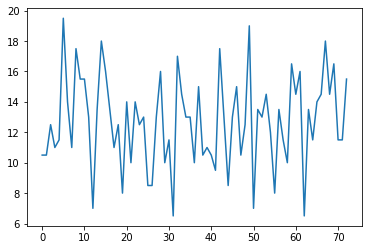

In [69]:
hits = [n_hits(i) for i in range(len(results.index[:724]))]
hits_df = pd.DataFrame(hits,columns=['hits'])
hits_df['group'] = hits_df.index // n
hits_avg = hits_df.groupby('group').median()

plt.plot(range(len(hits_avg)), hits_avg)

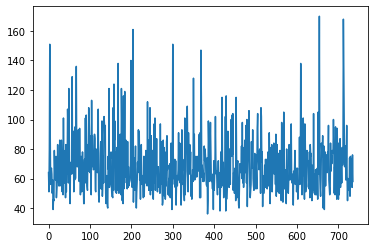

In [34]:
plt.plot(range(len(results)), results['plys'])

In [35]:
n = 10
results2 = results.copy()
results2['group'] = results2.index // n

In [36]:
results2

,game,avg_loss,final_state_loss,plys,group
0,0,0.003899,0.496376,64,0
1,1,0.002242,0.019283,51,0
2,2,0.000668,0.496732,80,0
3,3,0.000172,0.004221,151,0
4,4,0.000129,0.004160,93,0
...,...,...,...,...,...
731,715,0.011913,0.499996,73,73
732,716,0.000006,0.499994,72,73
733,717,0.000007,0.000017,54,73
734,718,0.011637,0.499992,76,73


In [44]:
grouped_results = results2.groupby('group').median()

In [43]:
grouped_results

,game,avg_loss,final_state_loss,plys
group,,,,
0,4.5,0.003673,0.252392,74.0
1,14.5,0.004710,0.350049,57.9
2,24.5,0.006442,0.251808,67.0
3,23.2,0.007537,0.350606,66.6
4,6.5,0.001302,0.161406,77.9
...,...,...,...,...
69,678.5,0.006609,0.350002,67.2
70,688.5,0.005185,0.449998,65.4
71,698.5,0.002388,0.350001,89.5


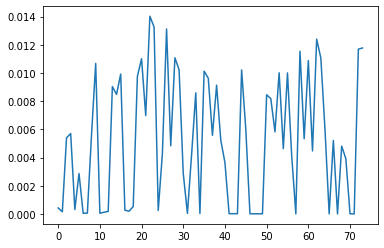

In [46]:
plt.plot(range(len(grouped_results)), grouped_results['avg_loss'])